## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
np.random.seed(42)

### Importing Data

For this notebook, we are doing some EDA on the overall_sample and review_sample. In previous attempts, doing multiple graphs in one notebook, especially with the size of each, would cause the kernals to crash. We are not exploring natural language patterns in this notebook as we can make the assumptions most of the results in the eda_genres is representative in the overall_df and review_df.

In [5]:
overall_df = pd.read_csv('./data/overall_sample.csv')
overall_df.head(2)

,Title,profileName,review/score,review/summary,review/text,description,authors,image,categories,ratingsCount
0,Younger,Shon,4.0,Better than expected,I starting reading this book while waiting for...,In the hotly anticipated sequel to the beloved...,Pamela Redmond,http://books.google.com/books/content?id=Ohq8D...,Fiction,2.0
1,Brave New World,Jon,5.0,Great in its own way,I feel that 1984 and B.N.W. can be compared as...,Brave New World predicts - with eerie clarity ...,Aldous Huxley,http://books.google.com/books/content?id=kKh5D...,Fiction,2713.0


In [6]:
review_df = pd.read_csv('./data/review_sample.csv')
review_df.head(2)

,Title,profileName,review/score,review/summary,review/text,description,authors,image,categories,ratingsCount
0,Bridget Jones: The Edge of Reason,C. Prasojo,4.0,Fun to read,This book is a nice diary about Bridget Jones ...,"With another devastatingly hilarious, ridiculo...",Helen Fielding,http://books.google.com/books/content?id=dYONd...,Fiction,2088.0
1,To Kill A Mockingbird,Elissa Amyotte,5.0,Highshool Classic,I first read this book in grade 10 English cla...,Voted America's Best-Loved Novel in PBS's The ...,Harper Lee,http://books.google.com/books/content?id=PGR2A...,Fiction,2164.0


### 10 Authors that Appeared the Most in Overall Dataset

The barchart shows the 10 authors that appear often in my overall_df. The overall_df was obtained from a random sample ofhe original dataset without any conditions added to it. In some ways, this sample is representative of what the larger dataset like, so we can make assumptions like how J.R.R. Tolkien most likely appeared many times. Similarly, we can assume that if the authors appear in this list then their most popular works appear in the evaluation on book titles we did after.

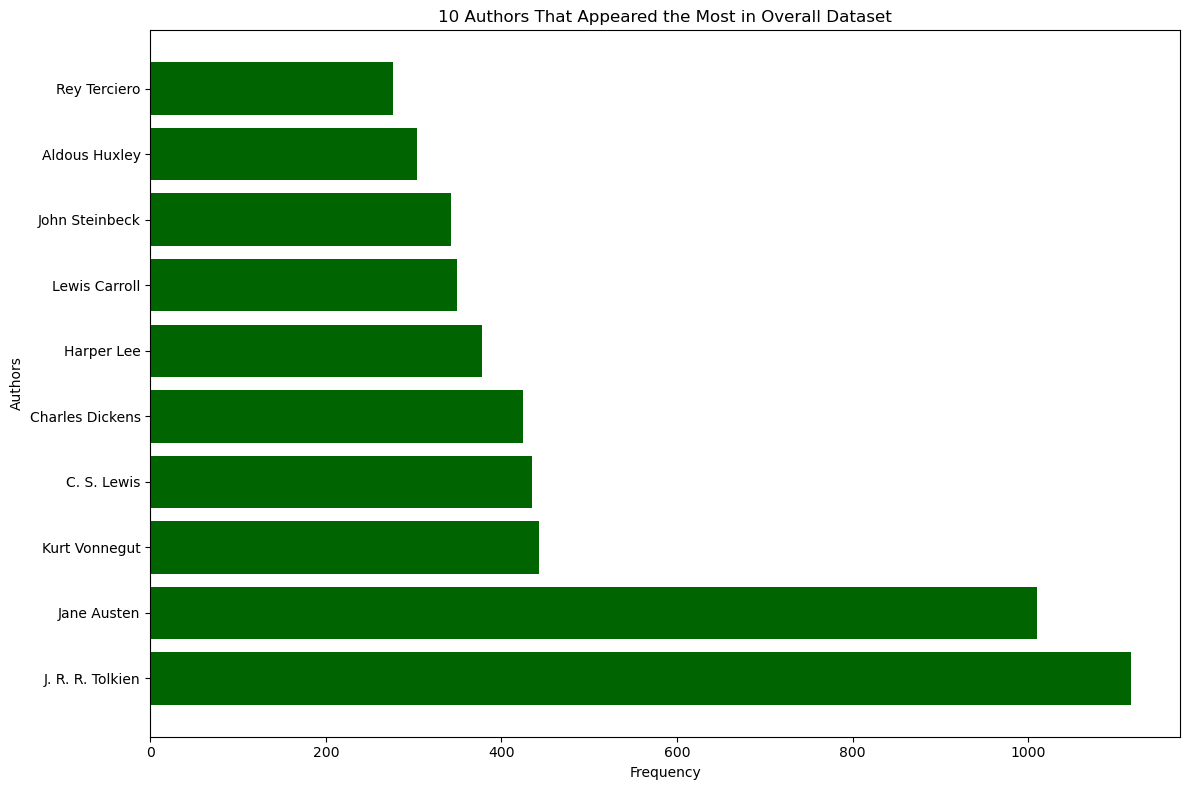

In [35]:
top_authors = overall_df['authors'].value_counts().head(10)
fig = plt.figure(figsize=(12, 8))

plt.barh(top_authors.index, top_authors.values, color = 'darkgreen')
plt.title('10 Authors That Appeared the Most in Overall Dataset')
plt.xlabel('Frequency')
plt.ylabel('Authors');

plt.tight_layout()
plt.savefig('./graphs/top_authors.png')

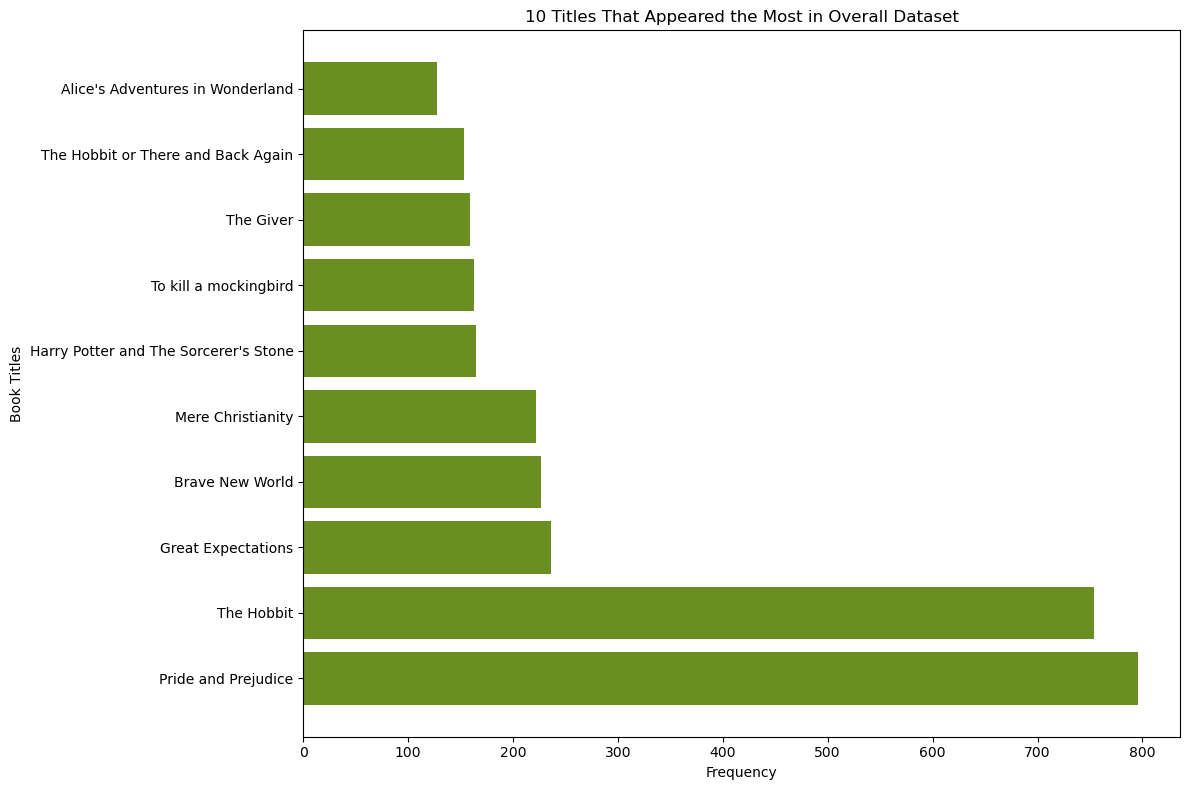

In [33]:
overall_books = overall_df['Title'].value_counts().head(10)
fig = plt.figure(figsize=(12, 8))

plt.barh(overall_books.index, overall_books.values, color = 'olivedrab')
plt.title('10 Titles That Appeared the Most in Overall Dataset')
plt.xlabel('Frequency')
plt.ylabel('Book Titles');

plt.tight_layout()
plt.savefig('./graphs/top_books.png')

### 10 Most Occurring Authors in Highly Reviewed Books Dataset

In my review_df, I put a condition that the books had to have at least 2000 reviews. If a book had many reviews, I assumed that it was a popular read and wanted to explore what relationships there were between reviews and readers. Like the overall_sample, the review_sample was a random sample of the original dataset. This barchart shows the 10 authors that appar the most in this dataset. Although it does not truly represent the day, it can show similar patterns as it.

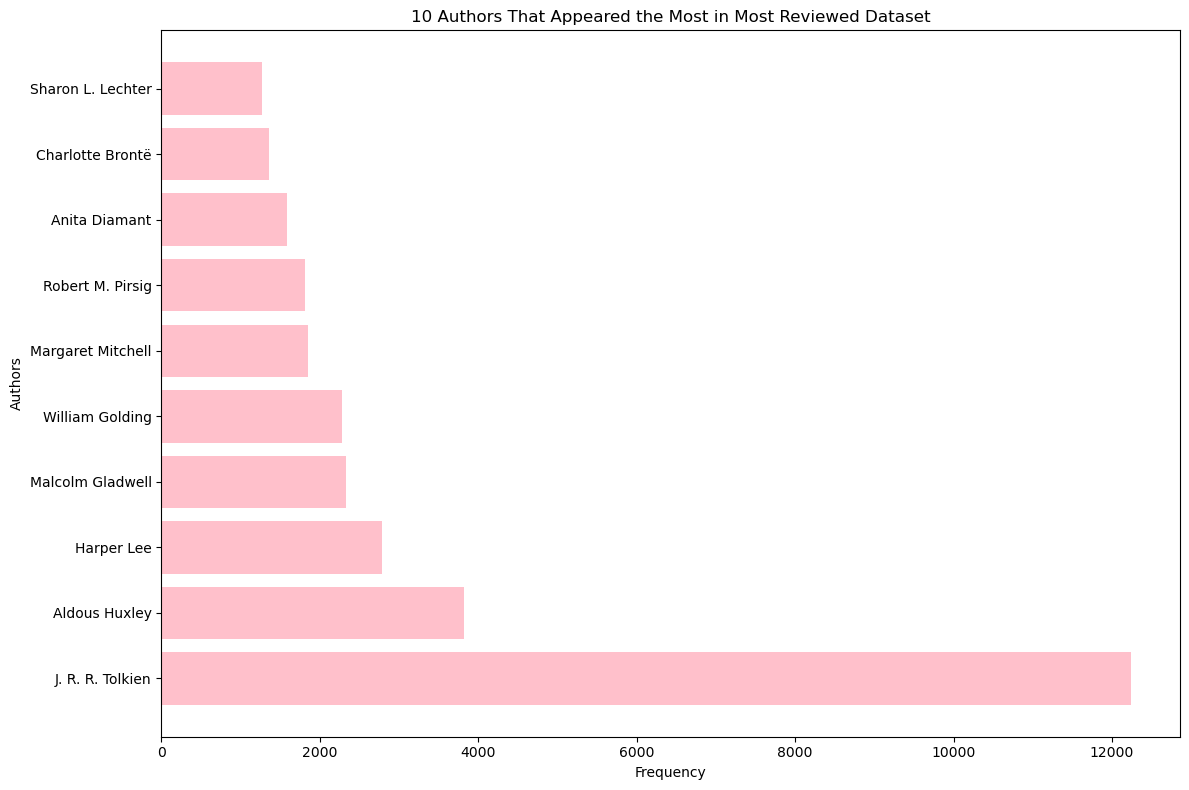

In [15]:
most_reviewed_authors = review_df['authors'].value_counts().head(10)
fig = plt.figure(figsize=(12, 8))

plt.barh(most_reviewed_authors.index, most_reviewed_authors.values, color = 'pink')
plt.title('10 Authors That Appeared the Most in Most Reviewed Dataset')
plt.xlabel('Frequency')
plt.ylabel('Authors');

plt.tight_layout()
plt.savefig('./graphs/top_books_reve.png')

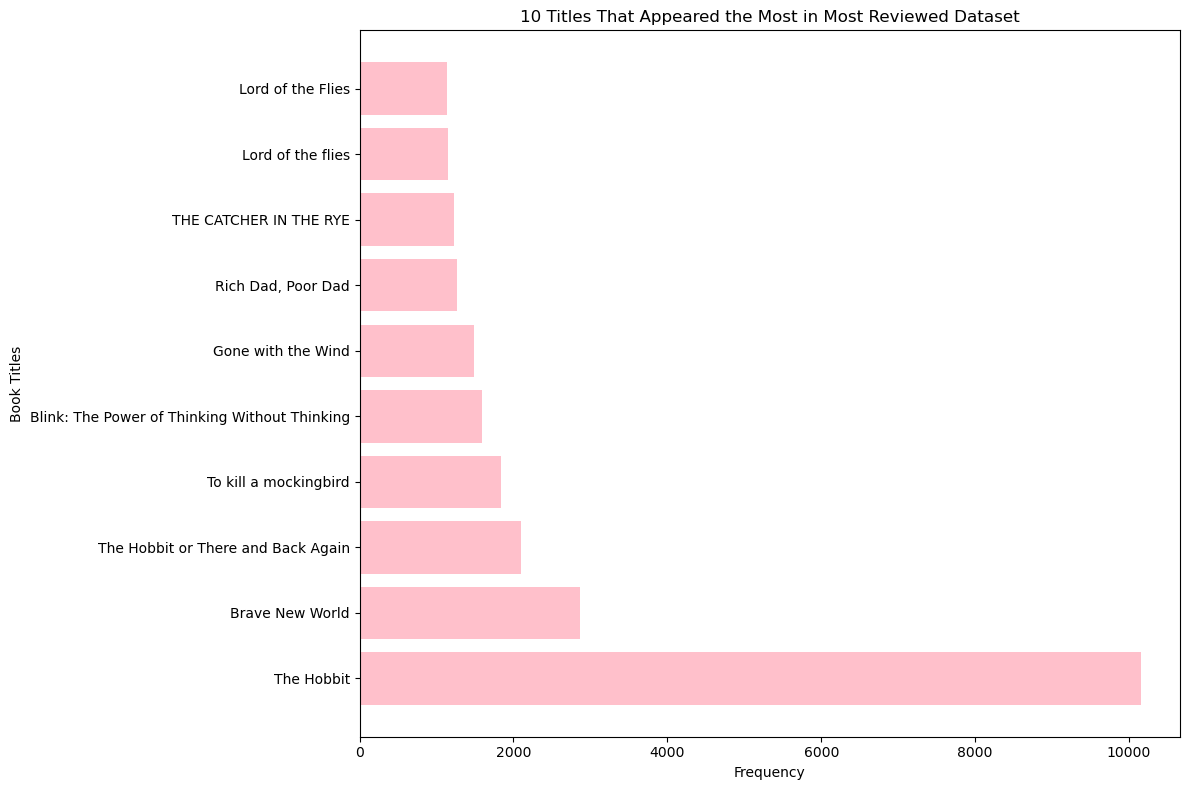

In [16]:
most_reviewed_books = review_df['Title'].value_counts().head(10)
fig = plt.figure(figsize=(12, 8))

plt.barh(most_reviewed_books.index, most_reviewed_books.values, color = 'pink')
plt.title('10 Titles That Appeared the Most in Most Reviewed Dataset')
plt.xlabel('Frequency')
plt.ylabel('Book Titles');

plt.tight_layout()
plt.savefig('./graphs/top_books_rev.png')

### Popularity of Authors, by Ratings

Using groupby, I evaluate the mean of ratingsCount for each author in my overall dataset. This aspect indicates the popularity of the authors as each value in ratingsCount is the number of ratings that they had in the original dataset. For example, J. R. R. Tolkien's 'The Hobbit' has over 2580 reviews, but only 754 are present in my overall_sample.

In [85]:
overall_df[overall_df['Title'] == 'The Hobbit']

,Title,profileName,review/score,review/summary,review/text,description,authors,image,categories,ratingsCount
38,The Hobbit,Scott Koors,4.0,Book Review,Book Review ofThe Hobbit written by J. R. R. T...,Celebrating 75 years of one of the world's mos...,J. R. R. Tolkien,http://books.google.com/books/content?id=LLSpn...,Juvenile Fiction,2580.0
54,The Hobbit,k eldridge,5.0,Amazing,"It is funny, cool ,unbelievable, impossible, e...",Celebrating 75 years of one of the world's mos...,J. R. R. Tolkien,http://books.google.com/books/content?id=LLSpn...,Juvenile Fiction,2580.0
112,The Hobbit,"Steven V. Thacker ""bla bla""",5.0,Only read this if you are a student.,"This is a great book, if you can follow what's...",Celebrating 75 years of one of the world's mos...,J. R. R. Tolkien,http://books.google.com/books/content?id=LLSpn...,Juvenile Fiction,2580.0
175,The Hobbit,"Nika Suli ""kalthea""",5.0,what an imagination,When I first read The Hobbit I was 13 and alth...,Celebrating 75 years of one of the world's mos...,J. R. R. Tolkien,http://books.google.com/books/content?id=LLSpn...,Juvenile Fiction,2580.0
190,The Hobbit,Sheila,5.0,very good,loved it. much easier to read than the Lord of...,Celebrating 75 years of one of the world's mos...,J. R. R. Tolkien,http://books.google.com/books/content?id=LLSpn...,Juvenile Fiction,2580.0
...,...,...,...,...,...,...,...,...,...,...
49751,The Hobbit,James Little,4.0,Children's book or literary masterpiece?,Don't be fooled into thinking this novel is fu...,Celebrating 75 years of one of the world's mos...,J. R. R. Tolkien,http://books.google.com/books/content?id=LLSpn...,Juvenile Fiction,2580.0
49781,The Hobbit,Joshua Kailer,5.0,Brilliant,The hobbit and the lord of the rings have been...,Celebrating 75 years of one of the world's mos...,J. R. R. Tolkien,http://books.google.com/books/content?id=LLSpn...,Juvenile Fiction,2580.0
49807,The Hobbit,Brian O'Neil,5.0,Such an amazing classic,"It been awhile since I read this, it's such an...",Celebrating 75 years of one of the world's mos...,J. R. R. Tolkien,http://books.google.com/books/content?id=LLSpn...,Juvenile Fiction,2580.0
49815,The Hobbit,Sabriel,5.0,Great to finally read the original.,I grew up with the animated version of this st...,Celebrating 75 years of one of the world's mos...,J. R. R. Tolkien,http://books.google.com/books/content?id=LLSpn...,Juvenile Fiction,2580.0


In [84]:
overall_df[overall_df['authors'] == 'J. R. R. Tolkien']

,Title,profileName,review/score,review/summary,review/text,description,authors,image,categories,ratingsCount
38,The Hobbit,Scott Koors,4.0,Book Review,Book Review ofThe Hobbit written by J. R. R. T...,Celebrating 75 years of one of the world's mos...,J. R. R. Tolkien,http://books.google.com/books/content?id=LLSpn...,Juvenile Fiction,2580.0
54,The Hobbit,k eldridge,5.0,Amazing,"It is funny, cool ,unbelievable, impossible, e...",Celebrating 75 years of one of the world's mos...,J. R. R. Tolkien,http://books.google.com/books/content?id=LLSpn...,Juvenile Fiction,2580.0
77,The Lord of the Rings (3 Volume Set),Mary Gair,5.0,Lord Of The Rings Box Set,GREAT the best trilogy ever,"A saga of dwarfs and elves, goblins and trolls...",J. R. R. Tolkien,http://books.google.com/books/content?id=hFfhr...,"Baggins, Bilbo (Fictitious character)",704.0
112,The Hobbit,"Steven V. Thacker ""bla bla""",5.0,Only read this if you are a student.,"This is a great book, if you can follow what's...",Celebrating 75 years of one of the world's mos...,J. R. R. Tolkien,http://books.google.com/books/content?id=LLSpn...,Juvenile Fiction,2580.0
175,The Hobbit,"Nika Suli ""kalthea""",5.0,what an imagination,When I first read The Hobbit I was 13 and alth...,Celebrating 75 years of one of the world's mos...,J. R. R. Tolkien,http://books.google.com/books/content?id=LLSpn...,Juvenile Fiction,2580.0
...,...,...,...,...,...,...,...,...,...,...
49751,The Hobbit,James Little,4.0,Children's book or literary masterpiece?,Don't be fooled into thinking this novel is fu...,Celebrating 75 years of one of the world's mos...,J. R. R. Tolkien,http://books.google.com/books/content?id=LLSpn...,Juvenile Fiction,2580.0
49781,The Hobbit,Joshua Kailer,5.0,Brilliant,The hobbit and the lord of the rings have been...,Celebrating 75 years of one of the world's mos...,J. R. R. Tolkien,http://books.google.com/books/content?id=LLSpn...,Juvenile Fiction,2580.0
49807,The Hobbit,Brian O'Neil,5.0,Such an amazing classic,"It been awhile since I read this, it's such an...",Celebrating 75 years of one of the world's mos...,J. R. R. Tolkien,http://books.google.com/books/content?id=LLSpn...,Juvenile Fiction,2580.0
49815,The Hobbit,Sabriel,5.0,Great to finally read the original.,I grew up with the animated version of this st...,Celebrating 75 years of one of the world's mos...,J. R. R. Tolkien,http://books.google.com/books/content?id=LLSpn...,Juvenile Fiction,2580.0


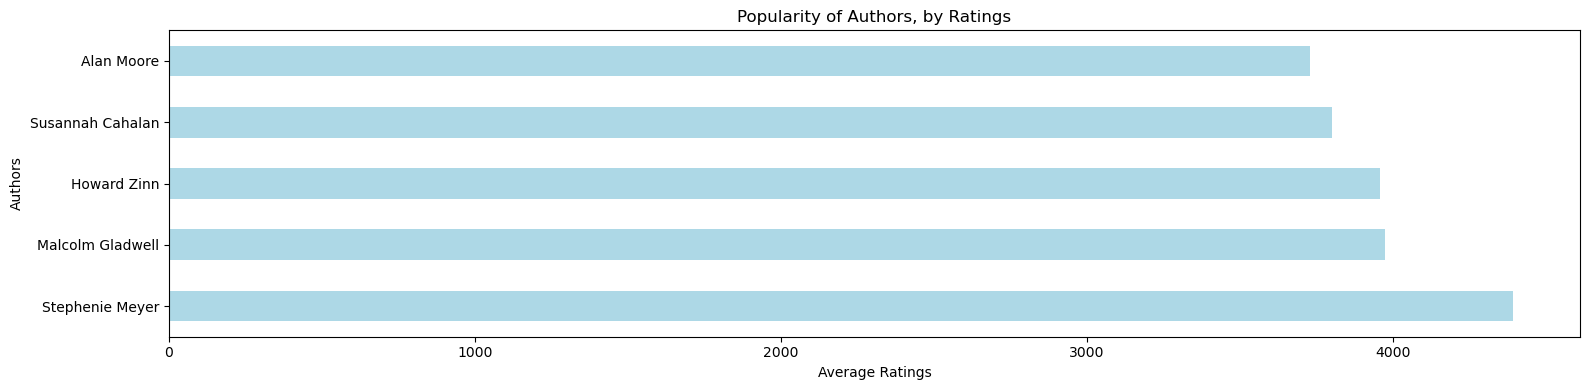

In [52]:
average_popularity = overall_df.groupby('authors')['ratingsCount'].mean()
fig = plt.figure(figsize=(16, 4))

popularity = average_popularity.sort_values(ascending = False).head(5)
popularity.plot(kind = 'barh', color = 'lightblue')
plt.title('Popularity of Authors, by Ratings')
plt.xlabel('Average Ratings')
plt.ylabel('Authors'); 

plt.tight_layout()
plt.savefig('./graphs/popular_authors.png')

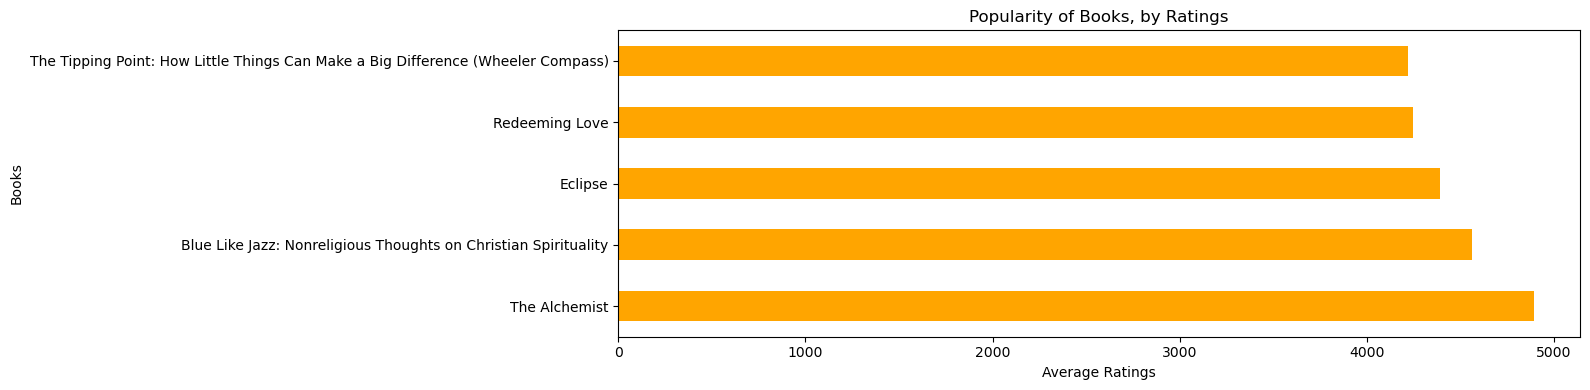

In [49]:
average_popularity = overall_df.groupby('Title')['ratingsCount'].mean()
fig = plt.figure(figsize=(16, 4))

popularity = average_popularity.sort_values(ascending = False).head(5)
popularity.plot(kind = 'barh', color = 'orange')
plt.title('Popularity of Books, by Ratings')
plt.xlabel('Average Ratings')
plt.ylabel('Books');

plt.tight_layout()
plt.savefig('./graphs/popular_books.png')

### Distribution of review/score

We evaluate the initial scores (x/5) that book reviewers gave. In the previous EDA, we noted the sentiment scores reflected positive feedback. This pattern continues in this graph as a majority of our data has 4/5 stars given.

In [16]:
scores = overall_df['review/score']

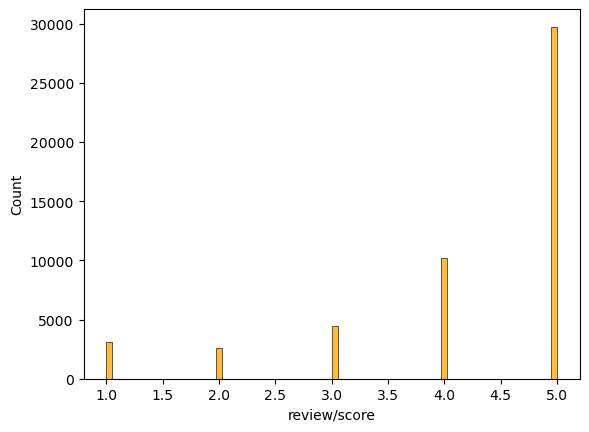

In [18]:
sns.histplot(overall_df['review/score'],color = 'orange');

### Distribution of Review Length

I found the length of the reviews and description through .apply(len) and made a histogram to show their distribution. Both show that the reviews and descriptions are short which relate the my concern in the previous eda_genres notebook that they will express the same phrases (e.g. New York Times Bestseller) which will affect the model.

In [18]:
overall_df['review_length'] = overall_df['review/text'].apply(len)

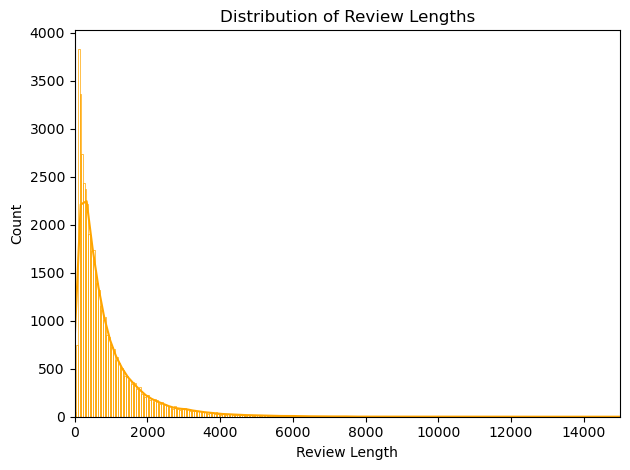

In [29]:
sns.histplot(overall_df['review_length'], color = 'orange', fill = False, kde = True)
plt.xlim(0, 15000)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count');

plt.tight_layout()
plt.savefig('./graphs/rev_length.png')

In [26]:
overall_df['desc_length'] = overall_df['description'].apply(len)

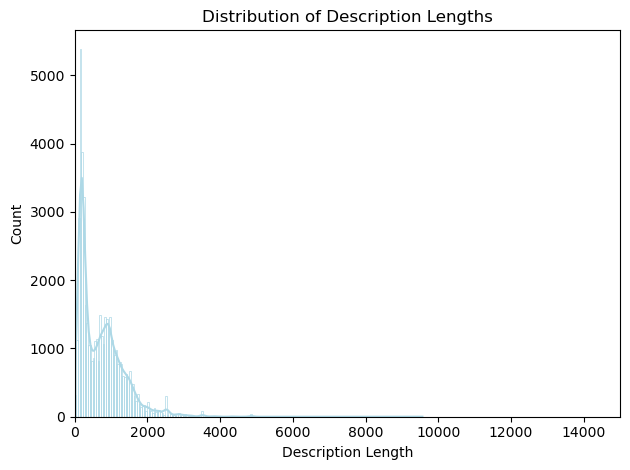

In [30]:
sns.histplot(overall_df['desc_length'], color = 'lightblue', fill = False, kde = True)
plt.xlim(0, 15000)
plt.title('Distribution of Description Lengths')
plt.xlabel('Description Length')
plt.ylabel('Count');

plt.tight_layout()
plt.savefig('./graphs/desc_length.png')

### Correlation Heat Map

The correlation heat map shows if there is a correlation between the columns to one another. We begin with label encoding the categorical columns with numerical values. Another method that we could explore would be dummy variables, but given the dataset size, this was not feasible to implement. 

[Label Encoder Code Source:](https://github.com/julianasaha/Food-Loss-and-Waste)

In [44]:
label_encoders = {}
for column in overall_df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    overall_df[column] = label_encoders[column].fit_transform(overall_df[column])

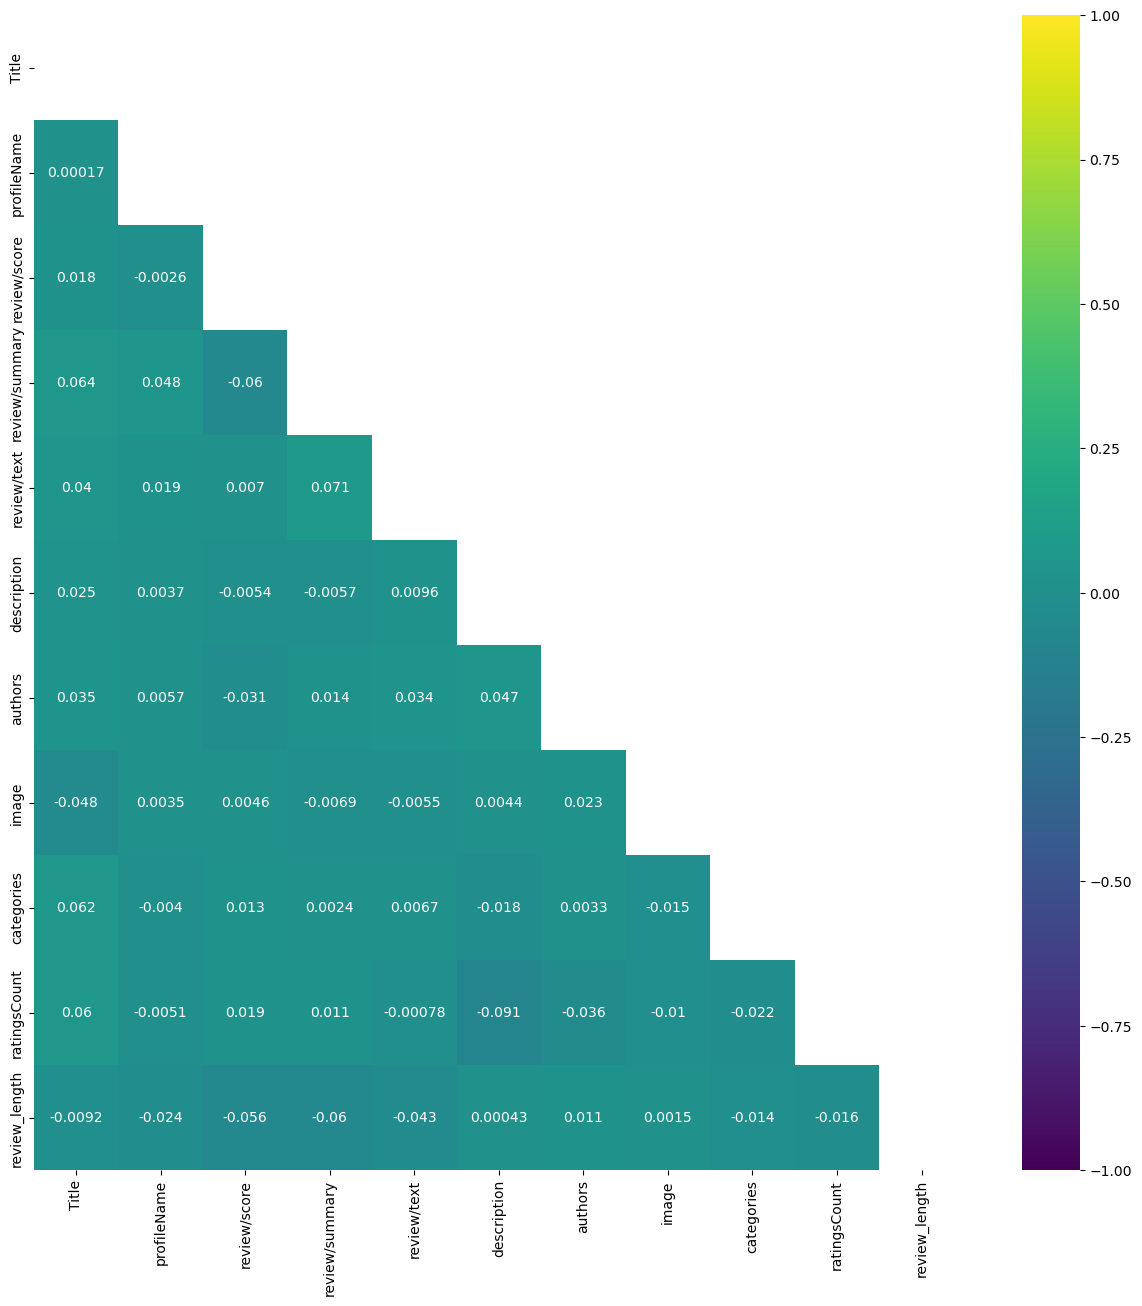

In [45]:
df_corr = overall_df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (15,15))
sns.heatmap(df_corr,
           cmap = 'viridis',
           vmax = 1,
           vmin = -1,
           annot = True,
           mask = mask);